# HEART DISEASE DATASET
 Using the Heart Disease Dataset to carry out Dimension Reduction using both Hierarchical and Kmeans clustering.

## BUSINESS OBJECTIVE
* Maximize Life expectancy
* Minimize Stress
* Minimize Heart disease factors

## CONSTRAINTS
* External problems
* Infrequent testing
* Unhealthy lifestyle


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                              | **Type** | **Relevance** |
|:--------:|:-------------------|:----------------------------------------------------------------------------------------------|:--------:|:-------------:|
|     1    | age                 | Age of the patient                                                                           | Ratio    | Relevant      |
|     2    | sex                 | Sex of the patient(1 = male; 0 = female)                                                      | Binary   | Relevant      |
|     3    | cp                  | chest pain type (4 values)                                                                   | Interval | Relevant      |
|     4    | trestbps            | resting blood pressure                                                                       | Ratio    | Relevant      |
|     5    | chol                | serum cholestoral in mg/dl                                                                   | Ratio    | Relevant      |
|     6    | fbs                 |  fasting blood sugar > 120 mg/dl where 1 = True , 0 = False                                  | Binary   | Relevant      |
|     7    | restecg             |  resting electrocardiographic results (values   0,1,2)                                       | Nominal  | Relevant      |
|     8    | thalach             | maximum heart rate achieved                                                                  | Ratio    | Relevant      |
|     9    | exang               |  exercise induced angina (1 = yes; 0 = no)                                                   | Binary   | Relevant      |
|    10    | oldpeak             |  oldpeak = ST depression induced by exercise   relative to rest                              | Ratio    | Relevant      |
|    11    | slope               |  the slope of the peak exercise ST segment   (1: upsloping, 2: flat, 3: downsloping)         | Nominal  | Relevant      |
|    12    | ca                  | number of major vessels (0-3) colored by   flourosopy                                        | Nominal  | Relevant      |
|    13    | thal                | thal: 0   = normal; 1 = fixed defect; 2 = reversable defect                                  | Nominal  | Relevant      |
|    14    | target              | Target variable which indicates diagnosis of Heart disease where 0 = no disease, 1 = disease | Binary   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from feature_engine.outliers import Winsorizer
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass8\heart disease.csv")
df=df0.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(303, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  1


In [8]:
df.drop_duplicates(inplace=True)
print(duplicate_values,colored(' Duplicate value was dropped.','blue',attrs=['bold']))

1  Duplicate value was dropped.


In [10]:
df=df.reset_index()

Checking the Number  of Missing Values in the Dataset.

In [11]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [12]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 index       302
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [13]:
df.mean()

index       150.956954
age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [14]:
df.median()

index       150.5
age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [15]:
stats.mode(df)

ModeResult(mode=array([[  0.,  58.,   1.,   0., 120., 197.,   0.,   1., 162.,   0.,   0.,
          2.,   0.,   2.,   1.]]), count=array([[  1,  19, 206, 143,  37,   6, 257, 151,  11, 203,  98, 141, 175,
        165, 164]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [16]:
df.var()

index       7700.938340
age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64

In [17]:
df.std()

index       87.754990
age          9.047970
sex          0.466426
cp           1.032044
trestbps    17.563394
chol        51.753489
fbs          0.356686
restecg      0.526027
thalach     22.903527
exang        0.470196
oldpeak      1.161452
slope        0.616274
ca           1.006748
thal         0.613026
target       0.498970
dtype: float64

In [18]:
Range=df.max()-df.min()
Range

index       302.0
age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [19]:
df.skew()

index       0.001471
age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [20]:
df.kurt()

index      -1.205773
age        -0.527512
sex        -1.391273
cp         -1.183729
trestbps    0.922996
chol        4.542591
fbs         1.937947
restecg    -1.359464
thalach    -0.062186
exang      -1.466170
oldpeak     1.567876
slope      -0.629935
ca          0.781003
thal        0.295855
target     -1.983008
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_12900\1005195116.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

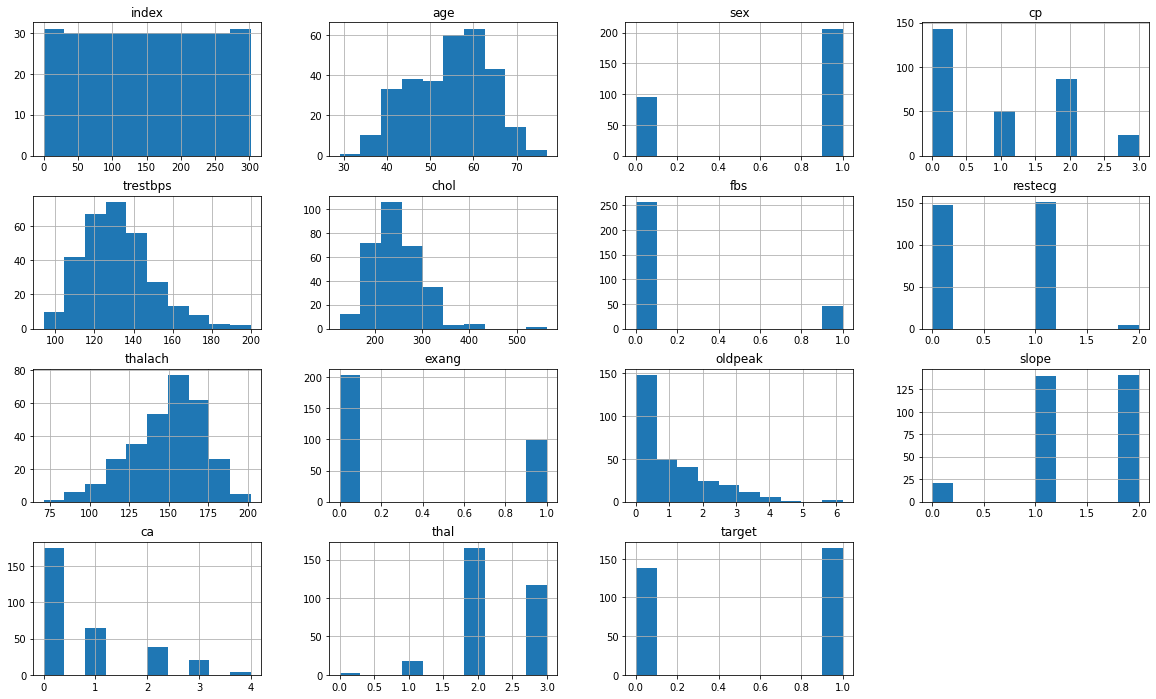

In [21]:
fig=plt.figure(figsize=(20,12))
ax=fig.gca()
df.hist(ax=ax)
plt.show

### BIVARIATE ANALYSIS

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


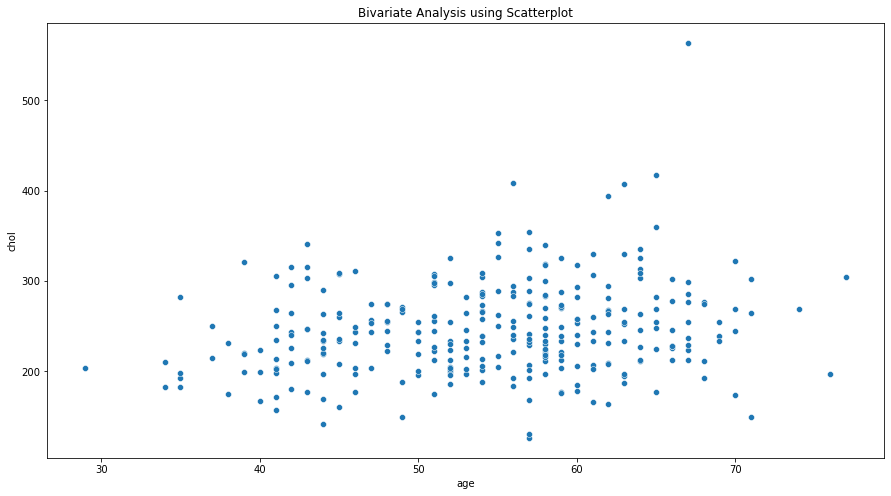

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.index,df['chol'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

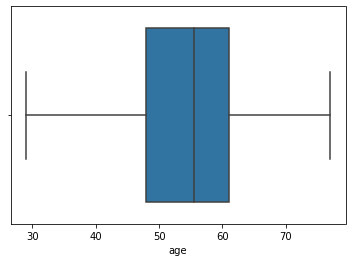

In [23]:
sns.boxplot(df["age"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

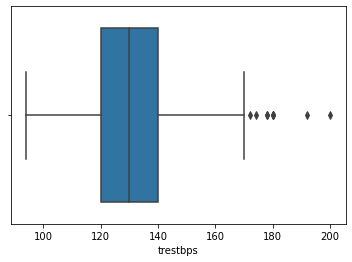

In [24]:
sns.boxplot(df['trestbps'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

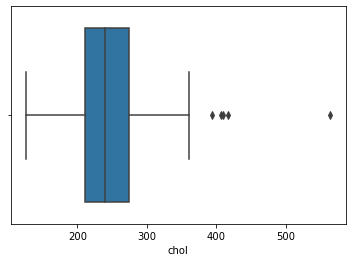

In [25]:
sns.boxplot(df['chol'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

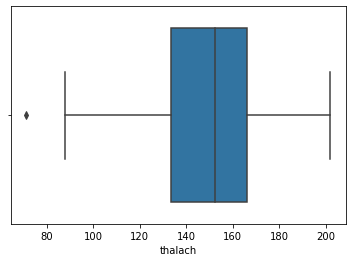

In [26]:
sns.boxplot(df['thalach'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

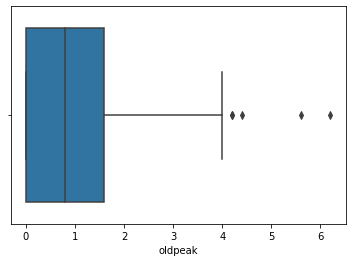

In [27]:
sns.boxplot(df['oldpeak'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [28]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [29]:
sum(outlier_func(df["trestbps"]))

9

In [30]:
sum(outlier_func(df["chol"]))

5

In [31]:
sum(outlier_func(df["thalach"]))

1

In [32]:
sum(outlier_func(df["oldpeak"]))

5

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [33]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["trestbps"])

df["trestbps"]= winsor.fit_transform(df[["trestbps"]])
sum(outlier_func(df["trestbps"]))

0

In [34]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["chol"])

df["chol"]= winsor.fit_transform(df[["chol"]])
sum(outlier_func(df["chol"]))

0

In [35]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['thalach'])
df['thalach']=winsor.fit_transform(df[['thalach']])
sum(outlier_func(df['thalach']))

0

In [36]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['oldpeak'])
df['oldpeak']=winsor.fit_transform(df[['oldpeak']])
sum(outlier_func(df['oldpeak']))

0

Again plotting boxplots to show the difference in the boxplots after rectifying the outliers.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

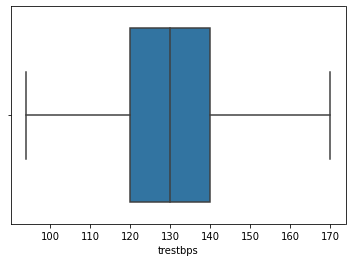

In [37]:
sns.boxplot(df['trestbps'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

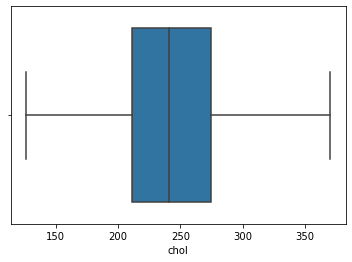

In [38]:
sns.boxplot(df['chol'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

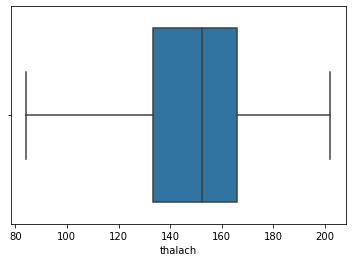

In [39]:
sns.boxplot(df['thalach'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

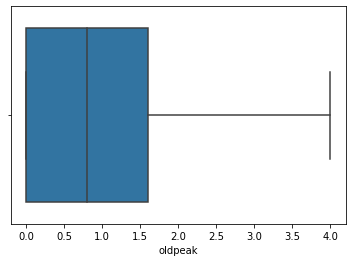

In [40]:
sns.boxplot(df['oldpeak'])

### NORMALIZATION
Before clustering the data is scaled using normalization 

Using the MinMaxScaler from sklearn.preprocessing library we do normalization and from the descriptive statistics we can see that the values are between 0 and 1.

In [41]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=pd.DataFrame(minmax.fit_transform(df),columns=df.columns,index=df.index)
df_minmax.head(3)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.000000,0.708333,1.0,1.000000,0.671053,0.437852,1.0,0.0,0.558855,0.0,0.575,0.0,0.0,0.333333,1.0
1,0.003311,0.166667,1.0,0.666667,0.473684,0.507417,0.0,0.5,0.872747,0.0,0.875,0.0,0.0,0.666667,1.0
2,0.006623,0.250000,0.0,0.333333,0.473684,0.319182,0.0,0.0,0.745493,0.0,0.350,1.0,0.0,0.666667,1.0


In [42]:
df_minmax.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.499857,0.529594,0.682119,0.321192,0.490241,0.488500,0.149007,0.263245,0.555572,0.327815,0.256954,0.698675,0.179636,0.771523,0.543046
std,0.290579,0.188499,0.466426,0.344015,0.218490,0.194319,0.356686,0.263014,0.193137,0.470196,0.277599,0.308137,0.251687,0.204342,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249172,0.395833,0.000000,0.000000,0.342105,0.347826,0.000000,0.000000,0.416755,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.498344,0.552083,1.000000,0.333333,0.473684,0.468542,0.000000,0.500000,0.580064,0.000000,0.200000,0.500000,0.000000,0.666667,1.000000
75%,0.750828,0.666667,1.000000,0.666667,0.605263,0.608696,0.000000,0.500000,0.694592,1.000000,0.400000,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### DIMENSION REDUCTION USING PCA

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_values=pca.fit_transform(df_minmax)
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([33.54, 47.2 , 57.16])

Text(0, 0.5, 'Percentage of Data')

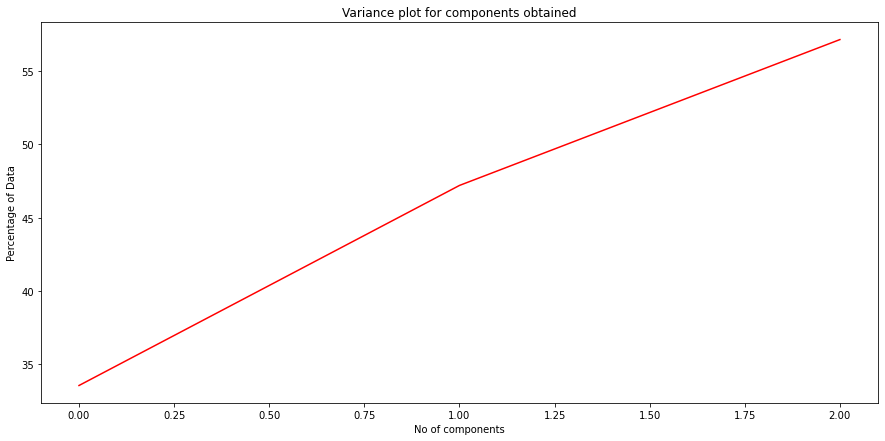

In [44]:
plt.figure(figsize=(15,7))
plt.plot(var1,color='red')
plt.title('Variance plot for components obtained')
plt.xlabel('No of components')
plt.ylabel('Percentage of Data')

In [45]:
df_pca=pd.DataFrame(pca_values)
df_pca.head()

,0,1,2
0,-0.527663,-0.421075,0.436802
1,-0.473671,-0.358982,-0.012069
2,-0.896556,0.439348,-0.059738
3,-0.684984,-0.454849,-0.273738
4,-0.378073,0.839012,-0.852567


##  HIERARCHICAL CLUSTERING WITHOUT USING PCA

### DENDROGRAM
Using the dendrogram to decide which method to use for clustering.

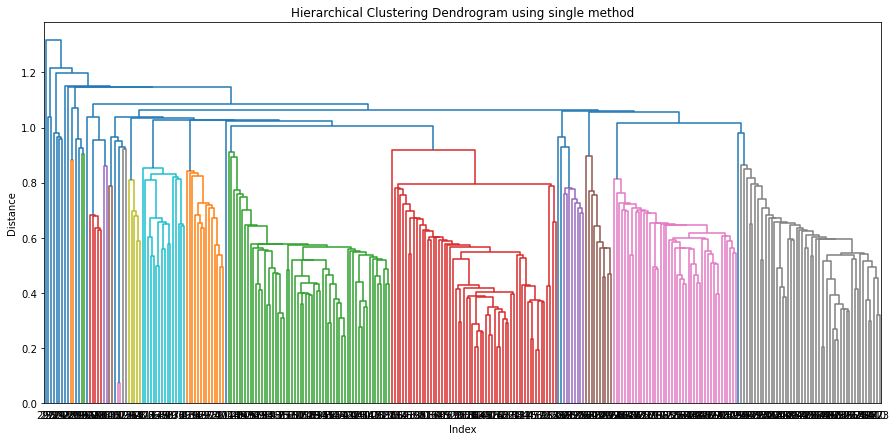

In [46]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_minmax,method='single',metric='euclidean')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering Dendrogram using single method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

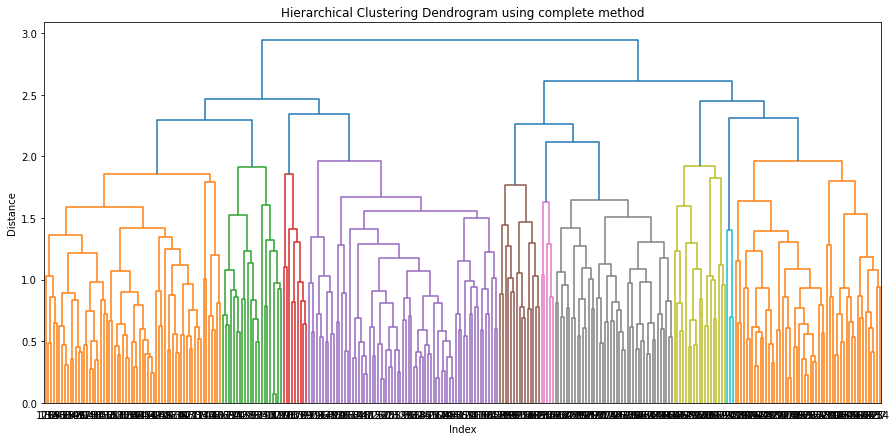

In [47]:
z=linkage(df_minmax,method='complete',metric='euclidean')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering Dendrogram using complete method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show

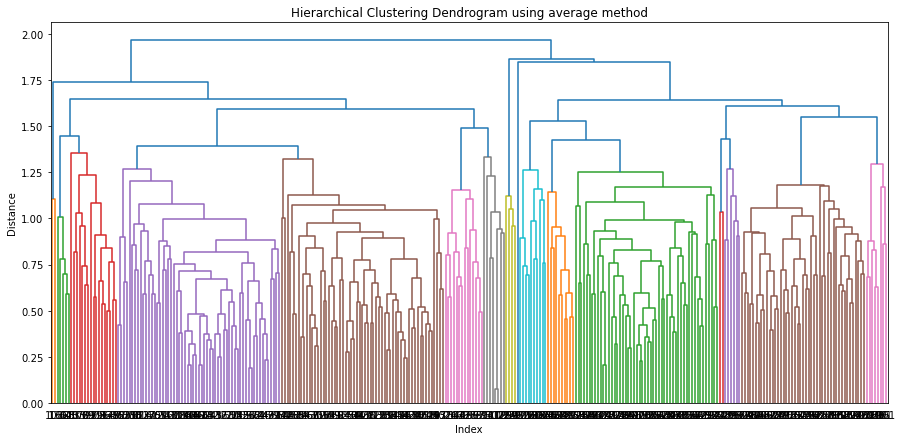

In [48]:
z=linkage(df_minmax,method='average',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using average method");plt.xlabel('Index');plt.ylabel("Distance")
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

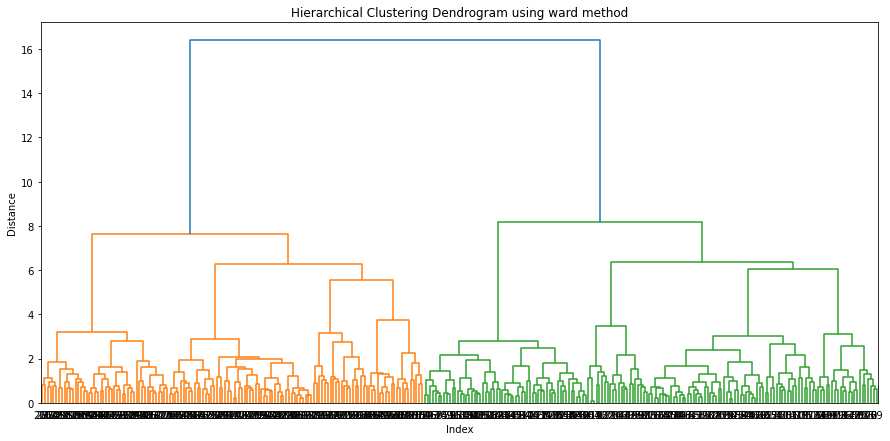

In [49]:
z=linkage(df_minmax,method='ward',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using ward method");plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

from the dendrogram it seems the ward method is the best to carry out clustering into 2 clusters.

### NO OF CLUSTERS : 2

In [50]:
from sklearn.cluster import AgglomerativeClustering
df_ward3=AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean').fit(df_minmax)
clust_ward=df_ward3.labels_
df_w3=df.copy()
df_w3['clust']=clust_ward
df_w3.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,0
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,0
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,0
4,4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1,0


In [51]:
df_w3.groupby(df_w3.clust).mean()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,81.5,52.585366,0.560976,1.371951,129.128049,241.031250,0.140244,0.591463,158.378049,0.140244,0.585366,1.591463,0.341463,2.121951,1.0
1,233.5,56.601449,0.826087,0.478261,133.789855,250.541667,0.159420,0.449275,139.196558,0.550725,1.553623,1.166667,1.166667,2.543478,0.0


In [52]:
df_w3.groupby(df_w3.clust).count()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138


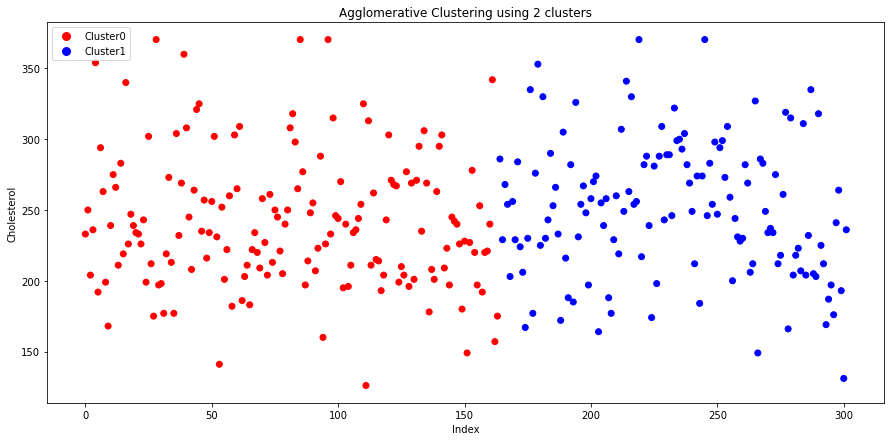

In [53]:
plt.figure(figsize=(15,7))
a=df_w3.clust.map({0:'red',1:'blue'})
plt.scatter(df_w3.index,df_w3.chol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                       markerfacecolor=mcolor,markersize=10) for i , mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title('Agglomerative Clustering using 2 clusters')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.show()

#### INSIGHTS
* Cluster 0 : In this group all are diagnosed with heart disease, the resting ecg values and maximum heart rate achieved are comparatively higher.The chest pains of type 1 and type 2 are more common.The population is also younger
* Cluster 1 : In this group none are diagnosed with heart disease, the resting ecg values and maximum heart rate are comparatively lower.This group is majority male and chest pains of type 0 and type 1 are more common.

##  HIERARCHICAL CLUSTERING  USING PCA

### DENDROGRAM
Using the dendrogram to decide which method to use for clustering.

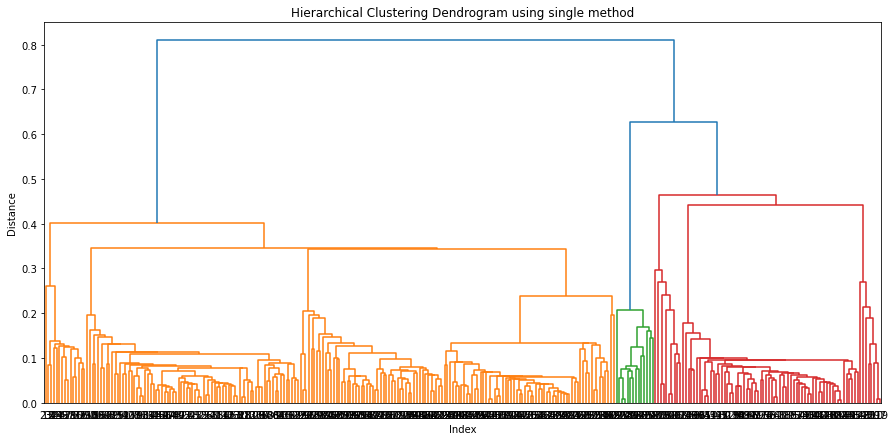

In [54]:
z=linkage(df_pca,method='single',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using single method"); plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

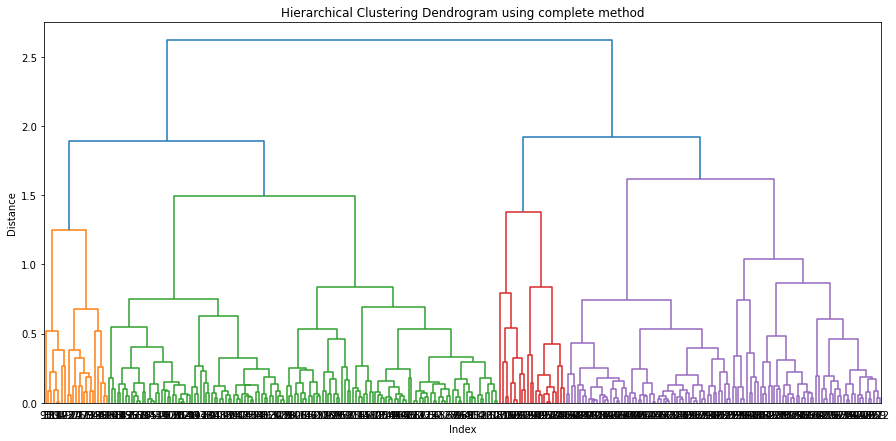

In [55]:
z=linkage(df_pca,method='complete',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using complete method");plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

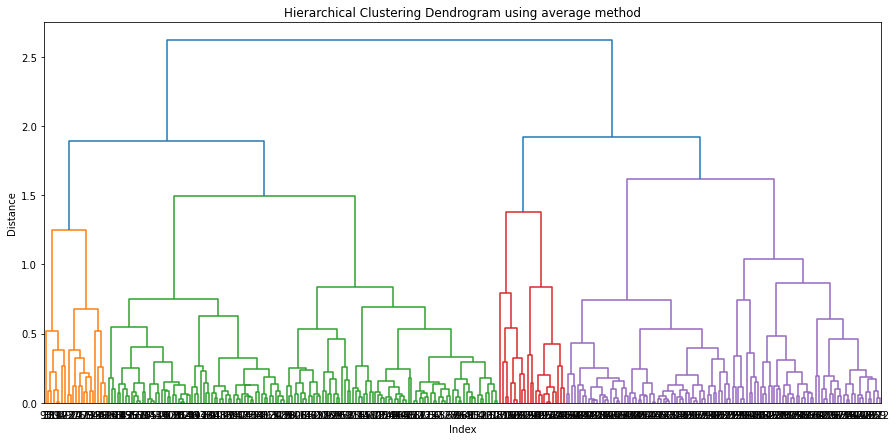

In [56]:
z=linkage(df_pca,method='complete',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using average method");plt.xlabel("Index");plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

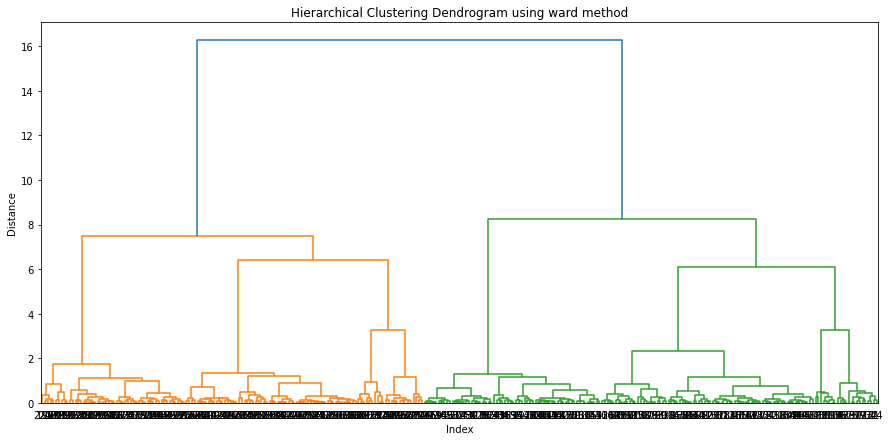

In [57]:
z=linkage(df_pca,method='ward',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using ward method");plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

from the dendrograms ward method seems to be a better method to clustering using 2 clusters.

### NO OF CLUSTERS : 2

In [58]:
pca_ward=AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean').fit(df_pca)
clust_pca=pd.DataFrame(pca_ward.labels_)
df_pca3=df.copy()
df_pca3['clust']=clust_pca
df_pca3.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,0
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,0
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,0
4,4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1,0


In [59]:
df_pca3.groupby(df_pca3.clust).mean()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,81.5,52.585366,0.560976,1.371951,129.128049,241.031250,0.140244,0.591463,158.378049,0.140244,0.585366,1.591463,0.341463,2.121951,1.0
1,233.5,56.601449,0.826087,0.478261,133.789855,250.541667,0.159420,0.449275,139.196558,0.550725,1.553623,1.166667,1.166667,2.543478,0.0


In [60]:
df_pca3.groupby(df_pca3.clust).count()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138


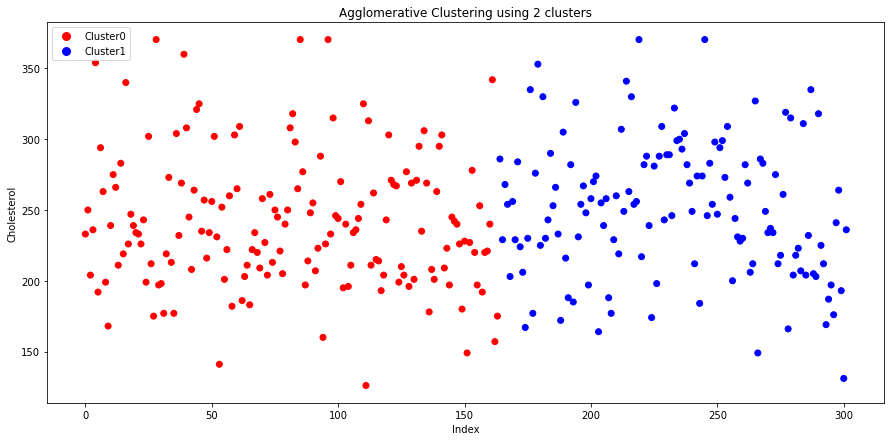

In [61]:
plt.figure(figsize=(15,7))
a=df_pca3.clust.map({0:'red',1:'blue'})
plt.scatter(df_pca3.index,df_pca3.chol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                       markerfacecolor=mcolor,markersize=10) for i , mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title('Agglomerative Clustering using 2 clusters')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.show()

#### INSIGHTS
* Cluster 0 : In this group all are diagnosed with heart disease, the resting ecg values and maximum heart rate achieved are comparatively higher.The chest pains of type 1 and type 2 are more common.The population is also younger
* Cluster 1 : In this group none are diagnosed with heart disease, the resting ecg values and maximum heart rate are comparatively lower.This group is majority male and chest pains of type 0 and type 1 are more common.

## KMEANS CLUSTERING WITHOUT USING PCA

### SCREE PLOT

In [65]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_minmax)
    TWSS.append(kmeans.inertia_)
TWSS

[323.95026284847114,
 281.8800909978632,
 244.32984161654753,
 228.1275337807432,
 212.14193190785355,
 202.3150989255746,
 193.80972610058188]

Text(0, 0.5, 'Total within SS')

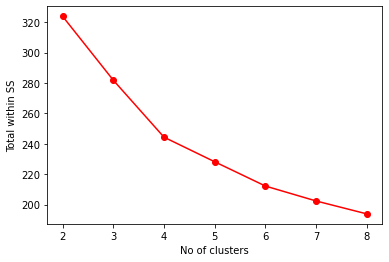

In [66]:
plt.plot(k,TWSS,'ro-');plt.xlabel('No of clusters');plt.ylabel('Total within SS')

from the scree plot 4 clusters seem to be the optimum number of clusters.

### NO OF CLUSTERS : 4

In [67]:
model=KMeans(n_clusters=4)
model.fit(df_minmax)
mb=model.labels_
df_k=df.copy()
df_k['clust']=mb
df_k.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,2
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,2
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,2
4,4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1,1


In [68]:
df_k.groupby(df_k.clust).mean()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,232.532468,56.337662,0.818182,0.155844,134.194805,254.056818,0.181818,0.480519,132.909091,1.000000,1.738961,1.064935,1.103896,2.584416,0.012987
1,86.902778,54.555556,0.000000,1.333333,128.597222,253.085069,0.083333,0.583333,154.027778,0.111111,0.554167,1.583333,0.305556,2.000000,1.000000
2,76.593407,50.901099,1.000000,1.417582,129.560440,231.252747,0.186813,0.593407,162.406593,0.153846,0.614286,1.604396,0.362637,2.208791,1.000000
3,233.177419,57.048387,0.838710,0.870968,133.193548,246.377016,0.129032,0.419355,146.453629,0.000000,1.301613,1.290323,1.241935,2.500000,0.000000


In [69]:
df_k.groupby(df_k.clust).count()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
1,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
2,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
3,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


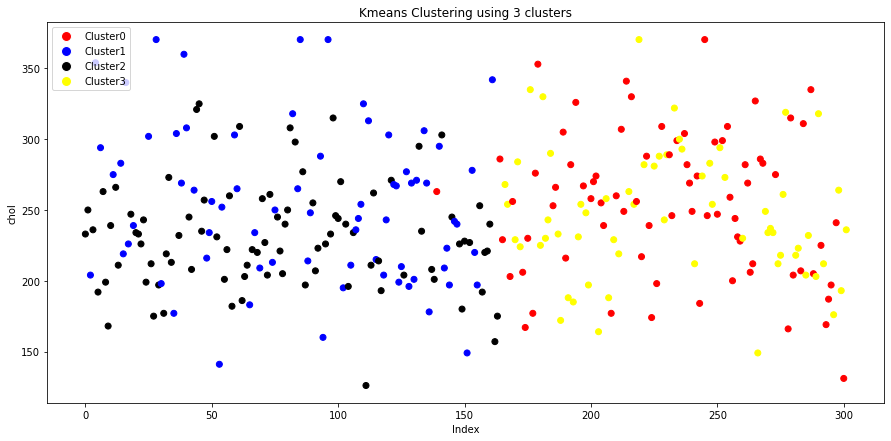

In [72]:
plt.figure(figsize=(15,7))
a=df_k.clust.map({0:'red',1:'blue',2:'black',3:'yellow'})
plt.scatter(df_k.index,df_k.chol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                 markerfacecolor=mcolor,markersize=10) for i , mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title('Kmeans Clustering using 3 clusters')
plt.xlabel('Index')
plt.ylabel('chol')
plt.show()

#### INSIGHTS
* Cluster 0 : In this group only a few are diagnosed with heart disease, the resting ecg and maximum heart rate values are low  and majority of the population is male.
* Cluster 1 : In this group all are diagnosed with heart disease, the resting ecg values and maximum heart rate achieved are comparatively higher.The population is comparatively younger and all are female.
* Cluster 2 : In this group all are diagnosed with heart disease, the resting ecg values and maximum heart rate achieved are comparatively higher.The population is comparatively younger and all are male.This group has the highest number of patients.
* Cluster 3 : In this group none  are diagnosed with heart disease, the resting ecg and maximum heart rate values are also low  and majority of the population is male.

## KMEANS CLUSTERING USING PCA

### SCREE PLOT

In [74]:
TWSS=[]
k=list(range(2,9))
for i in  k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    TWSS.append(kmeans.inertia_)
TWSS

[129.4919419683951,
 88.87774416514122,
 55.93530398933471,
 40.38799053681771,
 27.959266717362407,
 22.598053740170553,
 17.27467285718209]

Text(0, 0.5, 'Total within SS')

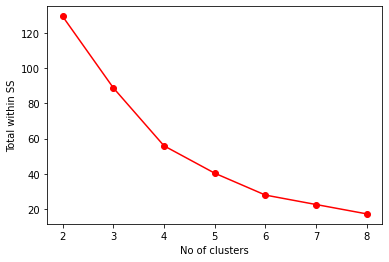

In [76]:
plt.plot(k,TWSS,'ro-');plt.xlabel('No of clusters');plt.ylabel('Total within SS')

from the scree plot 4 is the optimum number of clusters.

### NO OF CLUSTERS : 4

In [77]:
model=KMeans(n_clusters=4)
model.fit(df_pca)
mb=model.labels_
df_pk=df.copy()
df_pk['clust']=mb
df_pk.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,0
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,0
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,2
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,0
4,4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1,2


In [78]:
df_pk.groupby(df_pk.clust).mean()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
clust,,,,,,,,,,,,,,,
0,76.593407,50.901099,1.000000,1.417582,129.560440,231.252747,0.186813,0.593407,162.406593,0.153846,0.614286,1.604396,0.362637,2.208791,1.000000
1,232.532468,56.337662,0.818182,0.155844,134.194805,254.056818,0.181818,0.480519,132.909091,1.000000,1.738961,1.064935,1.103896,2.584416,0.012987
2,88.205479,54.643836,0.000000,1.315068,128.616438,254.138699,0.082192,0.575342,154.232877,0.109589,0.546575,1.589041,0.301370,2.000000,0.986301
3,234.016393,56.983607,0.852459,0.885246,133.245902,245.006148,0.131148,0.426230,146.084016,0.000000,1.322951,1.278689,1.262295,2.508197,0.000000


In [79]:
df_pk.groupby(df_k.clust).count()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clust
clust,,,,,,,,,,,,,,,,
0,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
1,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
2,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
3,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


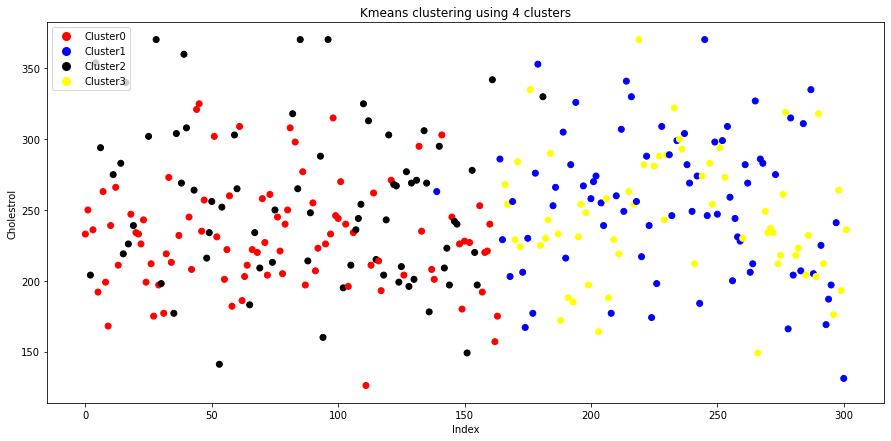

In [80]:
plt.figure(figsize=(15,7))
a=df_pk.clust.map({0:'red',1:'blue',2:'black',3:'yellow'})
plt.scatter(df_pk.index,df_pk.chol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                       markerfacecolor=mcolor,markersize=10) for i , mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title("Kmeans clustering using 4 clusters")
plt.xlabel('Index')
plt.ylabel('Cholestrol')
plt.show()

#### INSIGHTS
* Cluster 0 : In this group all are diagnosed with heart disease, the resting ecg values and maximum heart rate achieved are comparatively higher.The population is comparatively younger and all are male.  
* Cluster 1 : In this group only a few are diagnosed with heart disease, the resting ecg and maximum heart rate values are low  and majority of the population is male.
* Cluster 2 : In this group most are diagnosed with heart disease, the resting ecg values and maximum heart rate achieved are comparatively higher.The population is comparatively younger and all are female.This group has the most number of patients.
* Cluster 3 : In this group none  are diagnosed with heart disease, the resting ecg and maximum heart rate values are also low  and majority of the population is male.

## CONCLUSION
From the above insights we can get the following inferences : 


* While doing Hierarchical clustering the results obtained after clustering dimension reduced components and the results obtained without doing dimension reduction were almost the same.

* But while doing Kmeans clustering the results obtained after clustering dimension reduced components and the results obtained without  doing dimension reduction were quite same but there were some differences.

__So from the above points we can infer that dimension reduction doesn't change the final output alot even though the data used is reduced which helps to reduce the computation time  without  compromising on the accuracy.__

As for the dataset, we can group them into two groups: 

* __High Risk__ : This group has a higher chance of having a heart disease , the resting ecg and maximum heart rate level give a clear idea about the chances of heart disease. Both these levels are high for this group and both male and female are almost in equal proportions.

* __Low Risk__ : This group has a lower chance of having a heart disease, the resting ecg and maximum heart rate levels are low. Majority of the population is male.

### BENEFIT
* From the above analysis we can find that the resting ecg and maximum heart rate values have very high influence over the chances of heart disease diagnosis.
* The type of chest pain is also has an influence , type 0 & 1 have lower chances whereas the type 1 & 2 have a higher chance.